### Importing Libraries

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [307]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Loading-in and Prepping Data from Crunchbase on PropTech Industry

In [416]:
#Initializing File with Path
filepath1 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/Crunchbase Data.csv")
crunchbase_data = pd.read_csv(filepath1, parse_dates=[0])

#Adding Column for Announced Years from Set Date
crunchbase_data["Announced Date"] = pd.to_datetime(crunchbase_data["Announced Date"])
crunchbase_data["Announced Year"] = crunchbase_data['Announced Date'].dt.year

#Setting Index for Data as Serial Number
crunchbase_data = crunchbase_data.set_index("Sl. No.")

#Viewing Data
crunchbase_data.head()
crunchbase_data.head(-5)

,Transaction Name,Organization Location,Funding Type,Money Raised,Announced Date,Announced Year,Funding Status,Total Funding Amount
Sl. No.,,,,,,,,
1,Series C - Nesto,"Montreal, Quebec, Canada, North America",Series C,80000000.0,2022-12-13,2022,Late Stage Venture,151354383.0
2,Private Equity Round - Pomerleau,"Quebec, Quebec, Canada, North America",Private Equity,150000000.0,2022-12-07,2022,Private Equity,200000000.0
3,Private Equity Round - Wilkar Property Management,"Westmount, Quebec, Canada, North America",Private Equity,NaN,2022-12-07,2022,Private Equity,NaN
4,Grant - Mero Technologies,"Toronto, Ontario, Canada, North America",Grant,1500000.0,2023-01-10,2023,NaN,4800000.0
5,Private Equity Round - TSE Management Services,"Richmond Hill, Ontario, Canada, North America",Private Equity,NaN,2022-12-07,2022,Private Equity,NaN
...,...,...,...,...,...,...,...,...
532,Post-IPO Equity - RioCan,"Toronto, Ontario, Canada, North America",Post-IPO Equity,230000000.0,2019-10-28,2019,NaN,680000000.0
533,Post-IPO Equity - Aston Bay Holdings,"Toronto, Ontario, Canada, North America",Post-IPO Equity,NaN,2018-04-26,2018,NaN,109802.0
534,Post-IPO Equity - Mosaic Capital,"Calgary, Alberta, Canada, North America",Post-IPO Equity,28776336.0,2014-06-20,2014,NaN,54193256.0


In [148]:
#Checking the Data Type to Ensure the Data is Graphable
print(crunchbase_data["Money Raised"].dtype)

float64


In [418]:
#Initializing second set of data frame to include important points to graph
Money_Raised2 = crunchbase_data[["Announced Year", "Money Raised","Funding Status"]]

#Dropping rows with no values
Money_Raised2 = Money_Raised2.dropna().copy()

#Dividing Money Raised by a million to easily view the data
Money_Raised2["Money Raised"] = Money_Raised2["Money Raised"].div(1000000).round(2)

#Showcasing Data
Money_Raised2.head(15)

,Announced Year,Money Raised,Funding Status
Sl. No.,,,
1,2022,80.00,Late Stage Venture
2,2022,150.00,Private Equity
6,2022,5.50,Seed
7,2022,36.00,Early Stage Venture
8,2022,4.00,Early Stage Venture
9,2022,2.55,Seed
10,2022,22.00,Early Stage Venture
12,2018,50.00,Private Equity
13,2022,8.10,Early Stage Venture


## Graphically Representing PropTech Industry Data in Canada

The graph below shows how much money proptech companies in Canada have raised over the years to relate back to how these companies can help to combat the effect of increasing housing prices within Canada. The stacked bar chart also shows the stage in which these companies are, with a majority of these companies being in their early stage of their business cycles with growth in private equity investment in late stage companies as well. A lot of these companies focus on increasing affordability to first-time homebuyers through alternative mortgage solutions, diverse equity offerings, and lower transaction costs with ease of purchasing/renting real-estate. PropTech investment has increased drastically largely due to the increase in housing prices. We see a lot of companies with new developments within the space. Compiled data from PropTech Collective Canada also show that there was a surge of new startups from 2015-2016 within this space, with an increase of over 32% in new companies in the PropTech industry. These companies are in their midstage currently, seeking late stage venture capital money or becoming established to IPO over the next couple years. In fact, 78% of Canadian PropTech companies were founded over the last decade but yet 71% of them are still in their seed stage. As a result, there is still a huge investment opportunity within the PropTech industry, to capitalize on how unaffordable housing in Canada has become and provide aid to help with these investments. 

The nearing recession, increasing rates, and the big impact in growth companies, brought down valuations but also removed a lot of capital from venture capital and private equity firms to make new investments. Due to this, investments in PropTech companies declined from 2021-2022 but these investments were still significantly more than the years 2019-2020. 

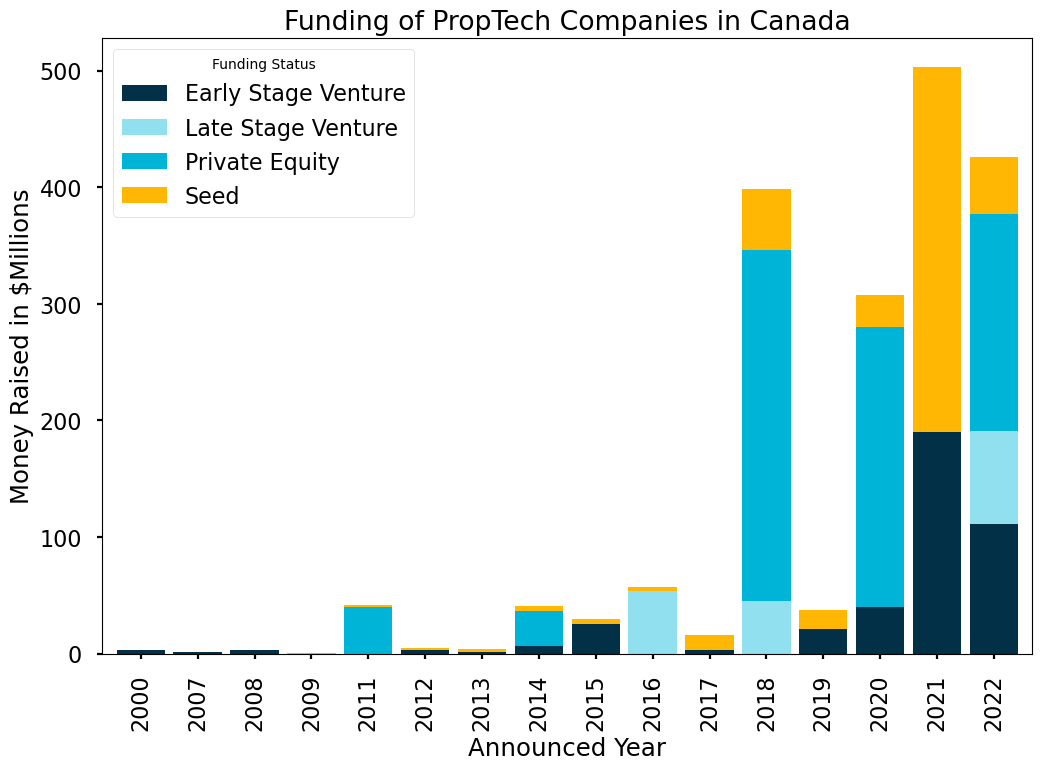

In [419]:
#Creating a Stacked Bar Chart of PropTech Companies in Canada and their Stages of Funding
Money_Raised_Grouped2 = Money_Raised2.groupby(["Announced Year","Funding Status"])["Money Raised"].sum().unstack().plot(kind='bar', title="Funding of PropTech Companies in Canada", ylabel="Money Raised in $Millions", figsize=(12,8), color={"Seed":"#ffb703","Early Stage Venture":"#023047","Private Equity":"#00b4d8","Late Stage Venture":"#90e0ef"}, width=0.85, stacked=True)

## Loading and Prepping the Data for New Development Properties

In [414]:
#Creating a path for New Development Properties
filepath2 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/New Housing Developments Data.csv")
New_Developments = pd.read_csv(filepath2,)

#Viewing the Data
New_Developments

,Year,Quarter,New Housing Stats
0,2002,Q1,36140
1,2002,Q2,59160
2,2002,Q3,55730
3,2002,Q4,54004
4,2003,Q1,38270
...,...,...,...
79,2021,Q4,68958
80,2022,Q1,48357
81,2022,Q2,72314
82,2022,Q3,73548


## Graphically Representing New Houses Developed Per Quarter Over the Last 20 Years

This graph below shows new houses that have been developed over time. From 2002-2007, we can see a constant amount of new houses build within Canada but as we go through recessionary times in 2008 and 2009, new developments decrease drastically. From 2010-2020, housing developments are constant around 175,000 new houses per year. The Canadian economy and government did anticipate a rise in housing prices and were expected to increase development further in 2020. This however, did not occur due to the global pandemic, reducing the priority of municipal governments to focus on housing over the response to the pandemic. But housing development did increase even further with a 25% increase in new developments from 2020 to 2021. 2022 is expected to produce slightly lower amount of housing than 2021 but still significantly more than the years prior to 2021.

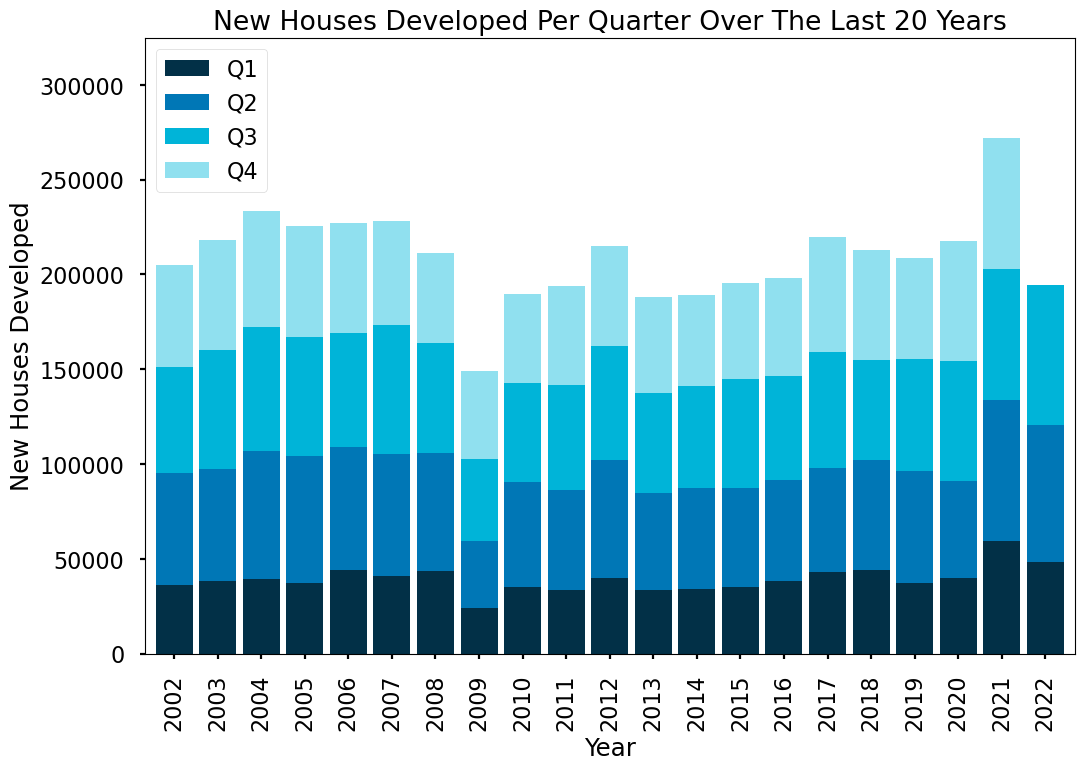

In [407]:
New_Developments_Graph= New_Developments.groupby(['Year', 'Quarter'])["New Housing Stats"].sum().unstack().plot(kind='bar', ylabel="New Houses Undergoing Development", title="New Houses Starting Development Per Quarter Over The Last 20 Years", figsize=(12,8), ylim=(0,325000), color={"Q1":"#023047","Q2":"#0077b6","Q3":"#00b4d8","Q4":"#90e0ef"}, width=0.85, stacked=True).legend(loc=2)

## Loading and Prepping Data for Owned vs Rented Property

In [382]:
# Setting up File Path and Reading CSV File
filepath4 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/Owned Vs Rented Property.csv")
rentvown= pd.read_csv(filepath4,)

#Setting Index to the Year
rentvown= rentvown.set_index("Year")
rentvown.head()

,Owned,Rented
Year,,
2011,9185845,4078230
2016,9541320,4474535
2021,9955970,4953835


In [385]:
#Extracting Data for Just 2021
rentvown_pie = rentvown.iloc[2]
rentvown_pie.head()

Owned     9955970
Rented    4953835
Name: 2021, dtype: int64

## Graphically Representing Owned vs Rented Property in 2021

The graph below shows the percentage of people that live in a house that they own in comparison to the percentage of people that live in a rented property. This percentage has been decreasing ever-so-slightly over the last census data as housing becomes more unaffordable for people to purchase adding on to our thesis.

<AxesSubplot:title={'center':'Census Canada 2021: Owned Vs Rented Property'}>

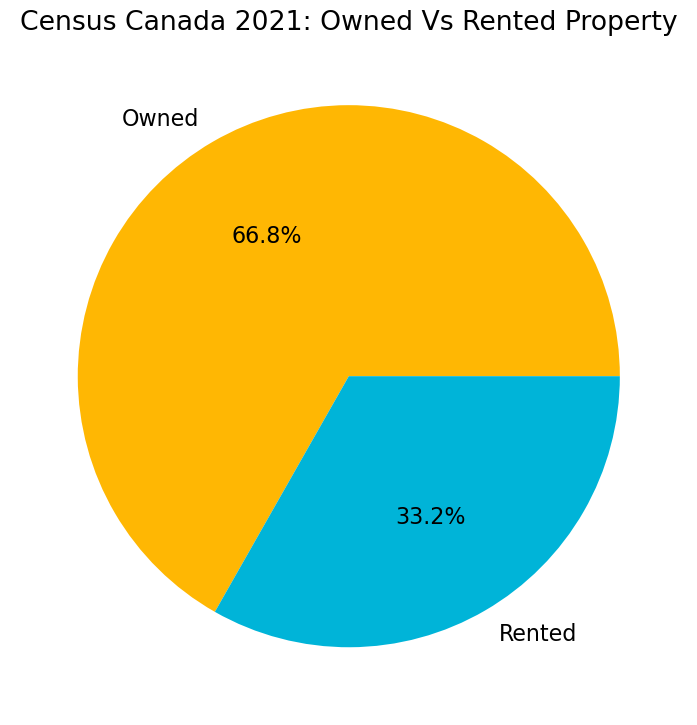

In [420]:
#Setting up Colours for the plot
colors=('#ffb703','#00b4d8')

#Creating plot with percentages showing owned vs rented property
rentvown_pie.plot(kind='pie', colors=colors, title="Census Canada 2021: Owned Vs Rented Property", ylabel="", autopct='%1.1f%%', textprops={'fontsize':16})